In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv")

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isna().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x=df.iloc[:,:-1]

In [7]:
y=df.iloc[:,-1]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=3)

In [9]:
x_train.shape

(712, 3)

In [10]:
x_test.shape

(179, 3)

In [11]:
x_test.isna().mean()

Age       0.184358
Fare      0.044693
Family    0.000000
dtype: float64

In [12]:
x_train.isna().mean()

Age       0.202247
Fare      0.051966
Family    0.000000
dtype: float64

In [13]:
mean_age=x_train["Age"].mean()
median_age=x_train["Age"].median()

In [14]:
mean_Fare=x_train["Fare"].mean()
median_Fare=x_train["Fare"].median()

In [15]:
mean_Fare

31.944714962962937

In [16]:
x_train["mean_age"]=x_train["Age"].fillna(mean_age)
x_train["median_age"]=x_train["Age"].fillna(median_age)

In [17]:
x_train["mean_fare"]=x_train["Fare"].fillna(mean_Fare)
x_train["median_fare"]=x_train["Fare"].fillna(median_Fare)

In [18]:
x_train

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
146,27.0,7.7958,0,27.000000,27.0,7.795800,7.7958
195,58.0,146.5208,0,58.000000,58.0,146.520800,146.5208
786,18.0,7.4958,0,18.000000,18.0,7.495800,7.4958
290,26.0,78.8500,0,26.000000,26.0,78.850000,78.8500
521,22.0,NaN,0,22.000000,22.0,31.944715,14.4000
...,...,...,...,...,...,...,...
256,NaN,79.2000,0,30.303715,29.0,79.200000,79.2000
643,NaN,56.4958,0,30.303715,29.0,56.495800,56.4958
249,54.0,26.0000,1,54.000000,54.0,26.000000,26.0000
664,20.0,7.9250,1,20.000000,20.0,7.925000,7.9250


In [19]:
x_train["Age"].var(),x_train["mean_age"].var(),x_train["median_age"].var()

(219.4128798268002, 174.97482821630902, 175.24944458331322)

In [20]:
x_train["Fare"].var(),x_train["mean_fare"].var(),x_train["median_fare"].var()

(2567.927686728423, 2434.2943190646374, 2449.4804988255223)

<AxesSubplot:ylabel='Density'>

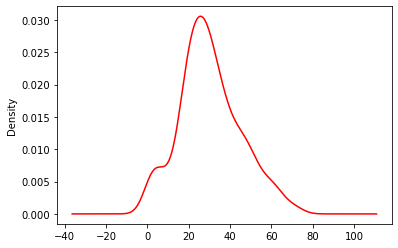

In [21]:
x_train["Age"].plot(kind="kde",color="red")

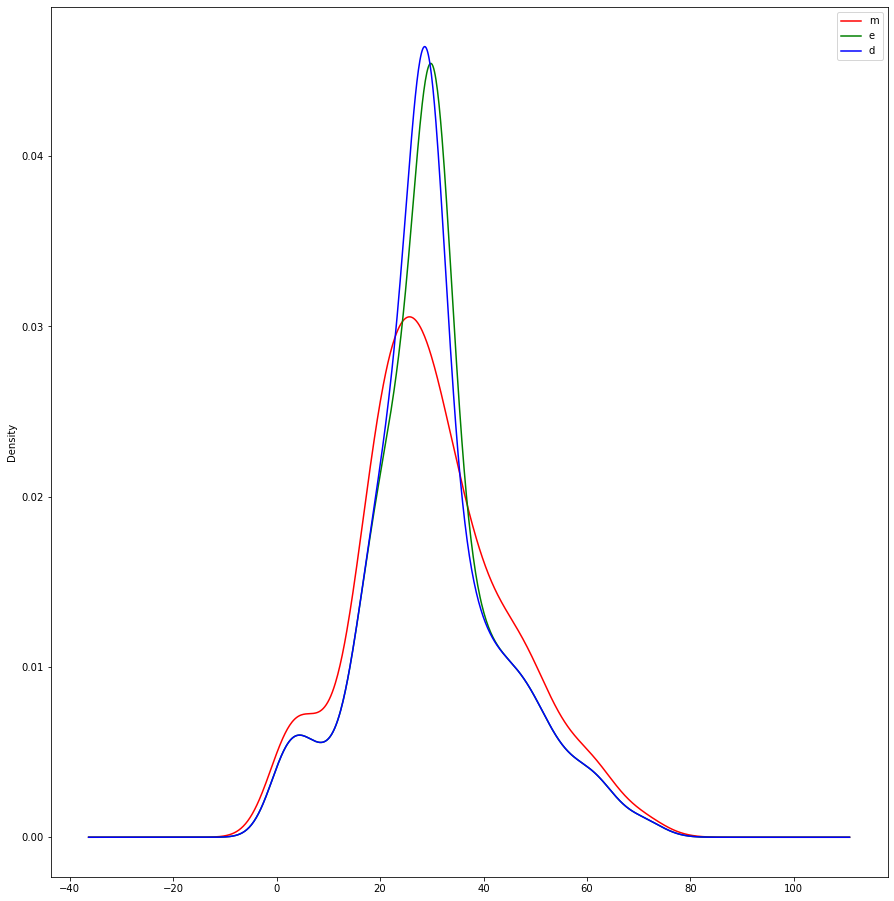

In [22]:
plt.subplots(figsize=(15,16))
x_train["Age"].plot.density(color="red",label="age")
plt.legend()
x_train["mean_age"].plot.density(color="green")
plt.legend("mean_age")
x_train["median_age"].plot.density(color="blue")
plt.legend("median_age")

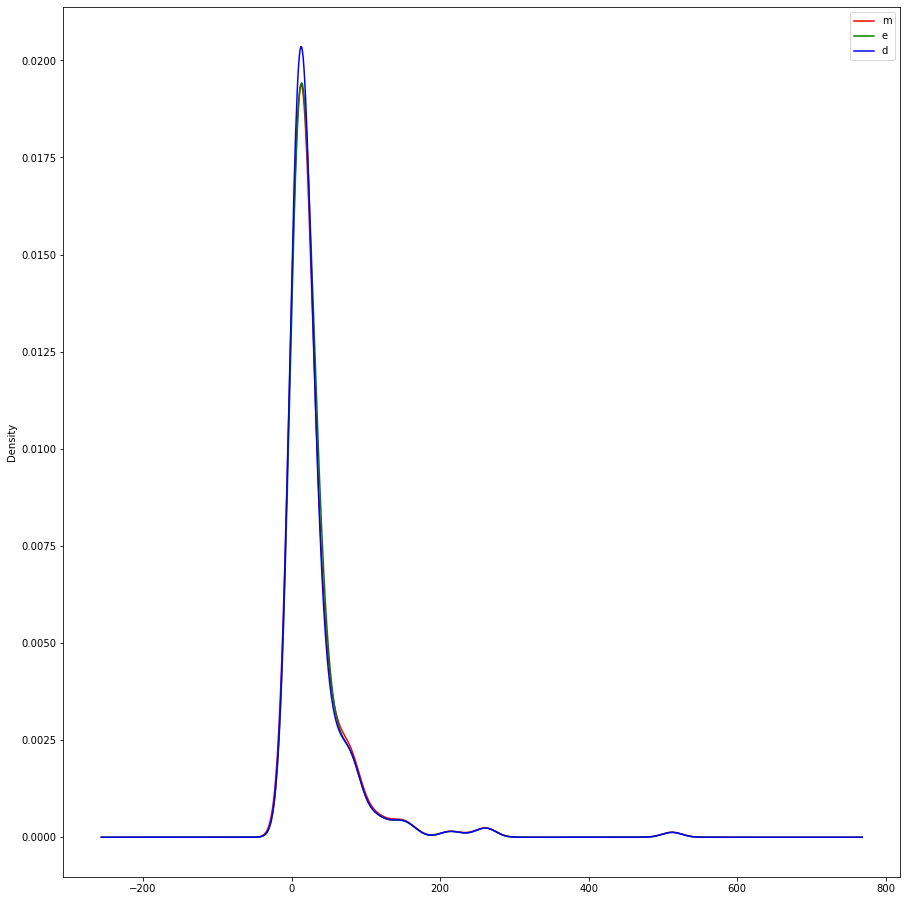

In [23]:
plt.subplots(figsize=(15,16))
x_train["Fare"].plot.density(color="red",label="fare")
plt.legend(["Age"],)
x_train["mean_fare"].plot.density(color="green")
plt.legend("mean_fare")
x_train["median_fare"].plot.density(color="blue")
plt.legend("median_fare")

In [24]:
x_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,219.412880,95.204389,-6.023340,219.412880,219.412880,89.800987,88.679151
Fare,95.204389,2567.927687,16.621812,75.544747,78.764841,2567.927687,2567.927687
Family,-6.023340,16.621812,2.266874,-4.803423,-4.713678,15.756823,15.758695
mean_age,219.412880,75.544747,-4.803423,174.974828,174.974828,71.613445,70.718817
median_age,219.412880,78.764841,-4.713678,174.974828,175.249445,74.665968,73.723626
mean_fare,89.800987,2567.927687,15.756823,71.613445,74.665968,2434.294319,2434.294319
median_fare,88.679151,2567.927687,15.758695,70.718817,73.723626,2434.294319,2449.480499


In [25]:
x_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.115737,-0.275539,1.000000,1.000000,0.113281,0.111448
Fare,0.115737,1.000000,0.215003,0.111851,0.116537,1.000000,1.000000
Family,-0.275539,0.215003,1.000000,-0.241185,-0.236493,0.212114,0.211480
mean_age,1.000000,0.111851,-0.241185,1.000000,0.999216,0.109729,0.108022
median_age,1.000000,0.116537,-0.236493,0.999216,1.000000,0.114316,0.112523
mean_fare,0.113281,1.000000,0.212114,0.109729,0.114316,1.000000,0.996895
median_fare,0.111448,1.000000,0.211480,0.108022,0.112523,0.996895,1.000000


<AxesSubplot:>

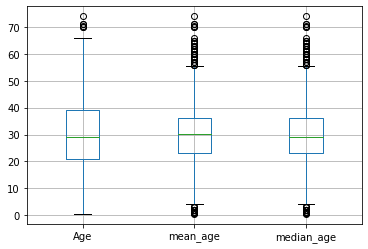

In [26]:
x_train[["Age","mean_age","median_age"]].boxplot()

<AxesSubplot:>

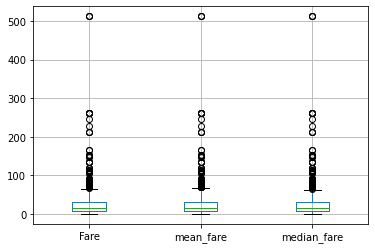

In [27]:
x_train[["Fare","mean_fare","median_fare"]].boxplot()

# Use sklearn

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=3)

In [29]:
Imputer1=SimpleImputer(strategy="mean")
Imputer2=SimpleImputer(strategy="median")

In [30]:
trf=ColumnTransformer([
    ("imputer1",Imputer1,[0]),
    ("imputer2",Imputer2,[1])
    
],remainder='passthrough')

In [31]:
x_train=trf.fit_transform(x_train)
x_test=trf.transform(x_test)

In [32]:
trf.named_transformers_['imputer1'].statistics_

array([30.30371479])

In [33]:
trf.named_transformers_['imputer2'].statistics_

array([14.4])

In [34]:
x_train

array([[ 27.    ,   7.7958,   0.    ],
       [ 58.    , 146.5208,   0.    ],
       [ 18.    ,   7.4958,   0.    ],
       ...,
       [ 54.    ,  26.    ,   1.    ],
       [ 20.    ,   7.925 ,   1.    ],
       [ 28.    ,  24.    ,   1.    ]])

In [35]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


AttributeError: Can only use .str accessor with string values!